### Importing libraries

In [2]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import mne
import os
from scipy.signal import welch
from scipy.stats import skew, kurtosis
from scipy.stats import entropy

### Reading and plotting a sample .edf file

Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\1018141478.py:2: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw_data = mne.io.read_raw_edf(edf_file_path, preload=True)


Using matplotlib as 2D backend.


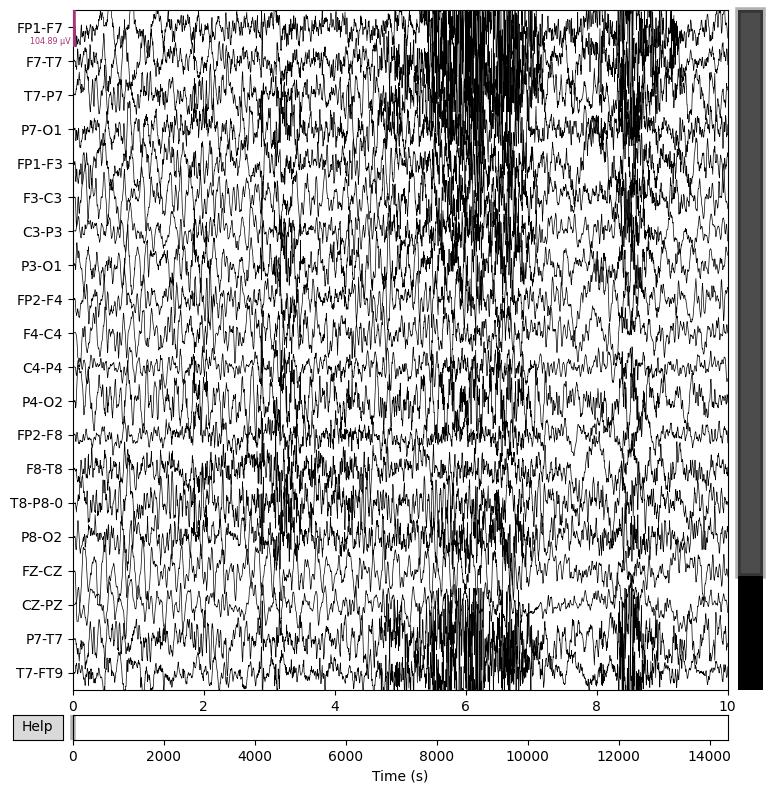

In [3]:
edf_file_path = r"C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_08.edf"
raw_data = mne.io.read_raw_edf(edf_file_path, preload=True)

raw_data.plot(scalings='auto', show=True, title='Raw EEG data')
plt.show()

### Defining function to extract features

In [4]:
def extract_features(raw):
    
    # Time-domain features
    mean_values = raw.get_data().mean(axis=1)
    variance_values = np.var(raw.get_data(), axis=1)
    skewness_values = skew(raw.get_data(), axis=1)
    kurtosis_values = kurtosis(raw.get_data(), axis=1)

    # Frequency-domain features
    psd_features = []
    for ch_idx in range(raw.info['nchan']):
        ch_data = raw.get_data()[ch_idx, :]
        _, psd = welch(ch_data, raw.info['sfreq'], nperseg=256)
        psd_features.append(np.max(psd))
        
    spectral_entropy_values = []
    for ch_idx in range(raw.info['nchan']):
        ch_data = raw.get_data()[ch_idx, :]
        spectral_entropy_values.append(entropy(psd, base=2))

    # Statistical features
    std_deviation_values = np.std(raw.get_data(), axis=1)
    median_values = np.median(raw.get_data(), axis=1)
    mad_values = np.median(np.abs(raw.get_data() - np.median(raw.get_data(), axis=1, keepdims=True)), axis=1)

    # Combine features
    all_features = np.concatenate([mean_values, variance_values, skewness_values, kurtosis_values,
                                   psd_features, spectral_entropy_values, std_deviation_values,
                                   median_values, mad_values], axis=0)
    return all_features

### Extracting features from each .edf file

In [7]:
data_folder = r'C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data'

all_features_list = []
labels_list = []
file_name_list = []

for patient_folder in os.listdir(data_folder):
    patient_path = os.path.join(data_folder, patient_folder)
    
    if os.path.isdir(patient_path):
        print(f"Processing patient: {patient_folder}")
        
        for file_name in os.listdir(patient_path):
            file_path = os.path.join(patient_path, file_name)
            
            if file_name.endswith('.edf'):
                
                raw = mne.io.read_raw_edf(file_path, preload=True)
                
                features = extract_features(raw)
                
                seizures_file_path = os.path.join(patient_path, f"{file_name}.seizures")
                label = 'seizure' if os.path.exists(seizures_file_path) else 'non-seizure'
                
                all_features_list.append(features)
                labels_list.append(label)
                file_name_list.append(file_name)
                
                print(f"Processed {file_name} and added features.")
                
        print("------------------------------")

Processing patient: chb01
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 681727  =      0.000 ...  2662.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_23.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_25.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 595199  =      0.000 ...  2324.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_26.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 153599  =      0.000 ...   599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_29.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_30.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_31.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_32.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_33.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_34.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_36.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_37.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_38.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_39.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_40.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_41.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_41.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_42.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_42.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_43.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_43.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb01\chb01_46.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb01_46.edf and added features.
------------------------------
Processing patient: chb02
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_16+.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_16+.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 245503  =      0.000 ...   958.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_23.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_25.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_26.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_28.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_29.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_30.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_31.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_32.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_33.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_34.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb02\chb02_35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb02_35.edf and added features.
------------------------------
Processing patient: chb03
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 923135  =      0.000 ...  3605.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_23.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_25.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_26.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_28.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_29.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_30.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_31.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_32.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_33.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_34.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_35.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_36.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_37.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb03\chb03_38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb03_38.edf and added features.
------------------------------
Processing patient: chb04
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3685887  =      0.000 ... 14397.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2441215  =      0.000 ...  9535.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1918975  =      0.000 ...  7495.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1236991  =      0.000 ...  4831.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3691519  =      0.000 ... 14419.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3685887  =      0.000 ... 14397.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3691007  =      0.000 ... 14417.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3515391  =      0.000 ... 13731.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3692799  =      0.000 ... 14424.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2735103  =      0.000 ... 10683.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_23.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3687935  =      0.000 ... 14405.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_25.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_26.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3693311  =      0.000 ... 14426.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3692287  =      0.000 ... 14422.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_28.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3687167  =      0.000 ... 14402.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_29.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_30.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_31.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_32.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_33.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_34.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_35.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_36.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1436927  =      0.000 ...  5612.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_37.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_38.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_39.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_40.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_41.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_41.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_42.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1490687  =      0.000 ...  5822.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_42.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb04\chb04_43.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb04_43.edf and added features.
------------------------------
Processing patient: chb05
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 924159  =      0.000 ...  3609.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_23.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_25.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_26.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_28.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_29.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_30.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_31.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_32.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_33.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_34.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_35.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_36.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_37.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_38.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb05\chb05_39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb05_39.edf and added features.
------------------------------
Processing patient: chb06
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3693311  =      0.000 ... 14426.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3394815  =      0.000 ... 13260.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 775679  =      0.000 ...  3029.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2029567  =      0.000 ...  7927.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb06\chb06_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb06_24.edf and added features.
------------------------------
Processing patient: chb07
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3689215  =      0.000 ... 14410.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1259519  =      0.000 ...  4919.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1192959  =      0.000 ...  4659.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 953855  =      0.000 ...  3725.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3087359  =      0.000 ... 12059.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb07\chb07_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3689215  =      0.000 ... 14410.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb07_19.edf and added features.
------------------------------
Processing patient: chb08
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_23.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb08\chb08_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 927487  =      0.000 ...  3622.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb08_29.edf and added features.
------------------------------
Processing patient: chb09
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2053887  =      0.000 ...  8022.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686143  =      0.000 ... 14398.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3690239  =      0.000 ... 14414.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686143  =      0.000 ... 14398.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3687679  =      0.000 ... 14404.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3689215  =      0.000 ... 14410.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3691775  =      0.000 ... 14420.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3479295  =      0.000 ... 13590.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 249343  =      0.000 ...   973.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb09\chb09_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1459199  =      0.000 ...  5699.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb09_19.edf and added features.
------------------------------
Processing patient: chb10
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1848319  =      0.000 ...  7219.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1846271  =      0.000 ...  7211.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1847807  =      0.000 ...  7217.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_28.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1846527  =      0.000 ...  7212.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_30.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1848575  =      0.000 ...  7220.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_31.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_38.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb10\chb10_89.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1843199  =      0.000 ...  7199.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb10_89.edf and added features.
------------------------------
Processing patient: chb11
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921087  =      0.000 ...  3597.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\3573795673.py:6: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  skewness_values = skew(raw.get_data(), axis=1)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\3573795673.py:7: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  kurtosis_values = kurtosis(raw.get_data(), axis=1)


Processed chb11_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_25.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_26.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_53.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_53.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_54.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_54.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_55.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_55.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_56.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_56.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_58.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_58.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_60.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_60.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_61.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_61.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_62.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_62.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_63.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_63.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_82.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_82.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_92.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_92.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb11\chb11_99.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 731903  =      0.000 ...  2858.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb11_99.edf and added features.
------------------------------
Processing patient: chb12
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 923135  =      0.000 ...  3605.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 924671  =      0.000 ...  3611.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 924415  =      0.000 ...  3610.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 622335  =      0.000 ...  2430.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_23.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_28.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 927743  =      0.000 ...  3623.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_29.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_32.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_33.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_34.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_35.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_36.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 925695  =      0.000 ...  3615.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_37.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_38.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_39.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_40.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_41.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_41.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb12\chb12_42.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb12_42.edf and added features.
------------------------------
Processing patient: chb13
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_30.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_36.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_37.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_38.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_39.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_40.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_47.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_47.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_55.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_55.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_56.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_56.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_58.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_58.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_59.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_59.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_60.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_60.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb13\chb13_62.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb13_62.edf and added features.
------------------------------
Processing patient: chb14
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_25.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_26.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_29.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_30.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_32.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_37.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_39.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb14\chb14_42.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb14_42.edf and added features.
------------------------------
Processing patient: chb15
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 922111  =      0.000 ...  3601.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_26.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_28.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_29.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_30.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_31.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_32.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_33.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_35.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_37.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_37.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_40.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_45.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_45.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_46.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_46.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_49.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 927999  =      0.000 ...  3624.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_49.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_50.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_50.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_51.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_51.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_52.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 923903  =      0.000 ...  3608.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_52.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_54.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_54.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_61.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_61.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_62.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_62.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb15\chb15_63.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4, --5
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb15_63.edf and added features.
------------------------------
Processing patient: chb16
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb16\chb16_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb16_19.edf and added features.
------------------------------
Processing patient: chb17
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17a_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17a_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17a_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17a_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17a_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17a_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17a_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17a_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17a_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17a_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17b_57.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17b_57.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17b_58.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17b_58.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17b_59.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17b_59.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17b_60.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17b_60.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17b_63.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 927743  =      0.000 ...  3623.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17b_63.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17b_67.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17b_67.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17b_68.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17b_68.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17b_69.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17b_69.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17c_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17c_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17c_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17c_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17c_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17c_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17c_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17c_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17c_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17c_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17c_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17c_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17c_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17c_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb17\chb17c_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb17c_13.edf and added features.
------------------------------
Processing patient: chb18
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 924415  =      0.000 ...  3610.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_23.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_25.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_26.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_28.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_29.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_30.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 582143  =      0.000 ...  2273.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_31.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_32.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_33.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_34.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_35.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_35.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb18\chb18_36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb18_36.edf and added features.
------------------------------
Processing patient: chb19
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_23.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_25.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_26.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 924671  =      0.000 ...  3611.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_28.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_29.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb19\chb19_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 853503  =      0.000 ...  3333.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb19_30.edf and added features.
------------------------------
Processing patient: chb20
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 923135  =      0.000 ...  3605.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 888063  =      0.000 ...  3468.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 926207  =      0.000 ...  3617.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 189951  =      0.000 ...   741.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 758783  =      0.000 ...  2963.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_23.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_25.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_26.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_28.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_29.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_30.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_31.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_34.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_59.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_59.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_60.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_60.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb20\chb20_68.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 554751  =      0.000 ...  2166.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'.', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb20_68.edf and added features.
------------------------------
Processing patient: chb21
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921343  =      0.000 ...  3598.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 765439  =      0.000 ...  2989.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_23.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_25.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_26.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_28.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_29.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_30.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_31.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_32.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_32.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb21\chb21_33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)
C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Scaling factor is not defined in following channels:
--0, --1, --2, --3, --4
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb21_33.edf and added features.
------------------------------
Processing patient: chb22
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 924415  =      0.000 ...  3610.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_22.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_23.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_24.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_24.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_25.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_25.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_26.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_26.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_27.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_27.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_28.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_28.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_29.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_29.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_30.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_30.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_38.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_51.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_51.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_54.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_54.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb22\chb22_77.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'-', 'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb22_77.edf and added features.
------------------------------
Processing patient: chb23
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb23\chb23_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1916415  =      0.000 ...  7485.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb23_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb23\chb23_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 655359  =      0.000 ...  2559.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb23_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb23\chb23_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2647551  =      0.000 ... 10341.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb23_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb23\chb23_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3693055  =      0.000 ... 14425.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb23_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb23\chb23_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb23_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb23\chb23_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb23_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb23\chb23_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3222271  =      0.000 ... 12586.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb23_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb23\chb23_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3686399  =      0.000 ... 14399.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb23_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb23\chb23_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1282303  =      0.000 ...  5008.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb23_20.edf and added features.
------------------------------
Processing patient: chb24
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_01.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_01.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_02.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_02.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_03.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_03.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_04.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_04.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_05.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_05.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_06.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_06.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_07.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_07.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_08.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_08.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_09.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_09.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_10.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_10.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_11.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_12.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_12.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_13.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_14.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_15.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_16.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_17.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_18.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_18.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_19.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_20.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 921599  =      0.000 ...  3599.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_21.edf and added features.
Extracting EDF parameters from C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data\chb24\chb24_22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 273151  =      0.000 ...  1066.996 secs...


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\278641812.py:18: RuntimeWarning: Channel names are not unique, found duplicates for: {'T8-P8'}. Applying running numbers for duplicates.
  raw = mne.io.read_raw_edf(file_path, preload=True)


Processed chb24_22.edf and added features.
------------------------------


### Collating the features into a dataframe

In [8]:
max_num_features = max(len(features) for features in all_features_list)
columns = [f"feature_{i}" for i in range(max_num_features)]
df = pd.DataFrame(all_features_list, columns=columns)

df['label'] = labels_list
df['File_no'] = file_name_list
#df = df.fillna(0)

In [9]:
df_final = df
df_final.head()

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_334,feature_335,feature_336,feature_337,feature_338,feature_339,feature_340,feature_341,label,File_no
0,2.639330e-07,2.050663e-07,1.659710e-07,1.868416e-07,2.250700e-07,1.820971e-07,1.997359e-07,2.171165e-07,2.339697e-07,2.068995e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non-seizure,chb01_01.edf
1,2.249746e-07,2.016479e-07,1.896635e-07,2.334550e-07,2.236777e-07,1.497414e-07,2.110636e-07,2.604756e-07,2.322806e-07,1.929067e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non-seizure,chb01_02.edf
2,1.792972e-07,1.699668e-07,2.115262e-07,2.129045e-07,1.915001e-07,1.780686e-07,2.059151e-07,2.027239e-07,1.950278e-07,1.785070e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,seizure,chb01_03.edf
3,1.755783e-07,1.818995e-07,2.024013e-07,2.087170e-07,1.891615e-07,1.691472e-07,2.055577e-07,2.034612e-07,2.072951e-07,1.842766e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,seizure,chb01_04.edf
4,2.200155e-07,2.160248e-07,1.745328e-07,1.597574e-07,2.146707e-07,1.971425e-07,2.074901e-07,1.803805e-07,2.317155e-07,2.059994e-07,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,non-seizure,chb01_05.edf


In [10]:
null_count = df_final.isnull().sum()
null_count

feature_0        0
feature_1        0
feature_2        0
feature_3        0
feature_4        0
              ... 
feature_339    647
feature_340    647
feature_341    647
label            0
File_no          0
Length: 344, dtype: int64

In [11]:
null_count = null_count.reset_index().rename(columns = {'index' : 'column', 0:'null_count'})
null_count.loc[null_count.null_count > 50]
df_final = df_final.drop(columns = null_count['column'].loc[null_count.null_count > 50])

In [12]:
df_final = df_final.fillna(0)
df_final.isnull().sum()

feature_0      0
feature_1      0
feature_2      0
feature_3      0
feature_4      0
              ..
feature_204    0
feature_205    0
feature_206    0
label          0
File_no        0
Length: 209, dtype: int64

In [13]:
df_final

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_199,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,label,File_no
0,2.639330e-07,2.050663e-07,1.659710e-07,1.868416e-07,2.250700e-07,1.820971e-07,1.997359e-07,2.171165e-07,2.339697e-07,2.068995e-07,...,0.000015,0.000013,0.000013,0.000014,0.000014,0.000021,0.000013,0.000014,non-seizure,chb01_01.edf
1,2.249746e-07,2.016479e-07,1.896635e-07,2.334550e-07,2.236777e-07,1.497414e-07,2.110636e-07,2.604756e-07,2.322806e-07,1.929067e-07,...,0.000017,0.000015,0.000015,0.000013,0.000012,0.000020,0.000011,0.000014,non-seizure,chb01_02.edf
2,1.792972e-07,1.699668e-07,2.115262e-07,2.129045e-07,1.915001e-07,1.780686e-07,2.059151e-07,2.027239e-07,1.950278e-07,1.785070e-07,...,0.000027,0.000028,0.000027,0.000020,0.000014,0.000023,0.000013,0.000021,seizure,chb01_03.edf
3,1.755783e-07,1.818995e-07,2.024013e-07,2.087170e-07,1.891615e-07,1.691472e-07,2.055577e-07,2.034612e-07,2.072951e-07,1.842766e-07,...,0.000023,0.000019,0.000020,0.000014,0.000013,0.000021,0.000012,0.000018,seizure,chb01_04.edf
4,2.200155e-07,2.160248e-07,1.745328e-07,1.597574e-07,2.146707e-07,1.971425e-07,2.074901e-07,1.803805e-07,2.317155e-07,2.059994e-07,...,0.000016,0.000014,0.000014,0.000013,0.000012,0.000019,0.000012,0.000016,non-seizure,chb01_05.edf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2.318168e-07,2.524382e-07,1.593500e-07,2.185389e-07,2.524259e-07,2.186559e-07,1.675371e-07,1.992610e-07,2.544299e-07,2.083986e-07,...,0.000028,0.000025,0.000023,0.000038,0.000028,0.000032,0.000022,0.000025,non-seizure,chb24_18.edf
682,2.526879e-07,2.433663e-07,1.490050e-07,2.363668e-07,2.935452e-07,1.980621e-07,1.628506e-07,2.119747e-07,2.901519e-07,1.873130e-07,...,0.000034,0.000023,0.000023,0.000050,0.000040,0.000038,0.000031,0.000035,non-seizure,chb24_19.edf
683,2.515966e-07,2.142327e-07,1.531992e-07,2.376539e-07,2.701071e-07,1.916234e-07,1.770719e-07,2.163063e-07,2.764533e-07,1.995811e-07,...,0.000030,0.000023,0.000023,0.000037,0.000029,0.000038,0.000030,0.000030,non-seizure,chb24_20.edf
684,2.480935e-07,2.597184e-07,1.521609e-07,2.377777e-07,2.788958e-07,2.567833e-07,1.342220e-07,2.185762e-07,2.746549e-07,2.012235e-07,...,0.000031,0.000024,0.000024,0.000038,0.000032,0.000041,0.000031,0.000030,seizure,chb24_21.edf


### Exporting the dataframe to a csv file

In [14]:
df_final.to_csv(r'C:\Users\karni\Downloads\fda_project_3\generated_data\output.csv', index = False)
print("Output csv generated")

Output csv generated


In [15]:
df_final['label'].value_counts()

label
non-seizure    545
seizure        141
Name: count, dtype: int64

In [40]:
df_final = pd.read_csv(r'C:\Users\karni\Downloads\fda_project_3\generated_data\output.csv')

In [31]:
path_to_folders = r'C:\Users\karni\Downloads\fda_project_3\chb-mit-scalp-eeg-database-1.0.0\data'

df_seizures = pd.DataFrame(columns = ['File_no','Seizure Number','Seizure Start Time','Seizure End Time'])

for folder_name in os.listdir(path_to_folders):
    folder_path = os.path.join(path_to_folders, folder_name)
    
    if os.path.isdir(folder_path):
        summary_file_path = os.path.join(folder_path, f'{folder_name}-summary.txt')
        
        if os.path.exists(summary_file_path):
            with open(summary_file_path, 'r') as summary_file:
                summary_text = summary_file.read()

            lines = summary_text.strip().split('\n')

            data = {'File Name': [], 'Count of Seizures': [], 'Seizure Start Time': [], 'Seizure End Time': []}
            current_file = None
            seizure_count = 0

            def time_to_seconds(time_str):
                if "seconds" in time_str:
                    return int(time_str.split()[0])
                else:
                    time_obj = datetime.strptime(time_str, "%H:%M:%S")
                    return time_obj.hour * 3600 + time_obj.minute * 60 + time_obj.second

            for line in lines:
                if line.startswith("File Name"):
                    current_file = line.split(":")[1].strip()
                elif line.startswith("Number of Seizures"):
                    seizure_count = int(line.split(":")[1].strip())
                
                elif seizure_count > 0 and line.startswith("Seizure"):
                    try :
                        seizure_number = int(line.split()[1])
                    except :
                        seizure_number = 1

                    start_time = None
                    end_time = None

                    if "Start Time" in line:
                        start_time = time_to_seconds(line.split(":")[1].strip())

                    if lines.index(line) + 1 < len(lines) and "End Time" in lines[lines.index(line) + 1]:
                        end_time = time_to_seconds(lines[lines.index(line) + 1].split(":")[1].strip())

                    data['File Name'].extend([current_file] * seizure_count)
                    data['Count of Seizures'].extend([seizure_number] * seizure_count)
                    data['Seizure Start Time'].extend([start_time] * seizure_count)
                    data['Seizure End Time'].extend([end_time] * seizure_count)

            temp = pd.DataFrame(data)
            temp = temp.dropna().drop_duplicates().rename(columns = {'Count of Seizures' : 'Seizure Number', 'File Name' : 'File_no'})
            df_seizures = pd.concat([df_seizures,temp])
            
print(df_seizures)

         File_no Seizure Number  Seizure Start Time  Seizure End Time
0   chb01_03.edf              1              2996.0            3036.0
2   chb01_04.edf              1              1467.0            1494.0
4   chb01_15.edf              1              1732.0            1772.0
6   chb01_16.edf              1              1015.0            1066.0
8   chb01_18.edf              1              1720.0            1810.0
..           ...            ...                 ...               ...
42  chb24_13.edf              1              3288.0            3304.0
44  chb24_14.edf              1              1939.0            1966.0
46  chb24_15.edf              1              3552.0            3569.0
48  chb24_17.edf              1              3515.0            3581.0
50  chb24_21.edf              1              2804.0            2872.0

[198 rows x 4 columns]


C:\Users\karni\AppData\Local\Temp\ipykernel_18636\532114323.py:56: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_seizures = pd.concat([df_seizures,temp])


In [47]:
df_seizures.to_csv('seizure_summary.csv')

In [48]:
df_seizures = pd.read_csv('seizure_summary.csv')

In [49]:
df_seizures_grouped = df_seizures.groupby('File_no')['Seizure Number'].count()
df_seizures_grouped = df_seizures_grouped.reset_index().rename(columns = {'Seizure Number' : 'seizure_count'})
df_seizures_grouped

,File_no,seizure_count
0,chb01_03.edf,1
1,chb01_04.edf,1
2,chb01_15.edf,1
3,chb01_16.edf,1
4,chb01_18.edf,1
...,...,...
136,chb24_13.edf,1
137,chb24_14.edf,1
138,chb24_15.edf,1
139,chb24_17.edf,1


In [41]:
df_final = pd.merge(df_final,df_seizures_grouped, on = 'File_no', how = 'left')
df_final = df_final.fillna(0)
df_final

,feature_0,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,...,feature_200,feature_201,feature_202,feature_203,feature_204,feature_205,feature_206,label,File_no,seizure_count
0,2.639330e-07,2.050663e-07,1.659710e-07,1.868416e-07,2.250700e-07,1.820971e-07,1.997359e-07,2.171165e-07,2.339697e-07,2.068995e-07,...,0.000013,0.000013,0.000014,0.000014,0.000021,0.000013,0.000014,non-seizure,chb01_01.edf,0.0
1,2.249746e-07,2.016479e-07,1.896635e-07,2.334550e-07,2.236777e-07,1.497414e-07,2.110636e-07,2.604756e-07,2.322806e-07,1.929067e-07,...,0.000015,0.000015,0.000013,0.000012,0.000020,0.000011,0.000014,non-seizure,chb01_02.edf,0.0
2,1.792972e-07,1.699668e-07,2.115262e-07,2.129045e-07,1.915001e-07,1.780686e-07,2.059151e-07,2.027239e-07,1.950278e-07,1.785070e-07,...,0.000028,0.000027,0.000020,0.000014,0.000023,0.000013,0.000021,seizure,chb01_03.edf,1.0
3,1.755783e-07,1.818995e-07,2.024013e-07,2.087170e-07,1.891615e-07,1.691472e-07,2.055577e-07,2.034612e-07,2.072951e-07,1.842766e-07,...,0.000019,0.000020,0.000014,0.000013,0.000021,0.000012,0.000018,seizure,chb01_04.edf,1.0
4,2.200155e-07,2.160248e-07,1.745328e-07,1.597574e-07,2.146707e-07,1.971425e-07,2.074901e-07,1.803805e-07,2.317155e-07,2.059994e-07,...,0.000014,0.000014,0.000013,0.000012,0.000019,0.000012,0.000016,non-seizure,chb01_05.edf,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
681,2.318168e-07,2.524382e-07,1.593500e-07,2.185389e-07,2.524259e-07,2.186559e-07,1.675371e-07,1.992610e-07,2.544299e-07,2.083986e-07,...,0.000025,0.000023,0.000038,0.000028,0.000032,0.000022,0.000025,non-seizure,chb24_18.edf,0.0
682,2.526879e-07,2.433663e-07,1.490050e-07,2.363668e-07,2.935452e-07,1.980621e-07,1.628506e-07,2.119747e-07,2.901519e-07,1.873130e-07,...,0.000023,0.000023,0.000050,0.000040,0.000038,0.000031,0.000035,non-seizure,chb24_19.edf,0.0
683,2.515966e-07,2.142327e-07,1.531992e-07,2.376539e-07,2.701071e-07,1.916234e-07,1.770719e-07,2.163063e-07,2.764533e-07,1.995811e-07,...,0.000023,0.000023,0.000037,0.000029,0.000038,0.000030,0.000030,non-seizure,chb24_20.edf,0.0
684,2.480935e-07,2.597184e-07,1.521609e-07,2.377777e-07,2.788958e-07,2.567833e-07,1.342220e-07,2.185762e-07,2.746549e-07,2.012235e-07,...,0.000024,0.000024,0.000038,0.000032,0.000041,0.000031,0.000030,seizure,chb24_21.edf,1.0


### Machine learning model using Logistic Regression

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

df2 = df_final
X = df2.drop(columns = ['label','File_no'], axis=1)
y = df2['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(random_state=42)
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.99
Confusion Matrix:
[[113   0]
 [  1  24]]
Classification Report:
              precision    recall  f1-score   support

 non-seizure       0.99      1.00      1.00       113
     seizure       1.00      0.96      0.98        25

    accuracy                           0.99       138
   macro avg       1.00      0.98      0.99       138
weighted avg       0.99      0.99      0.99       138



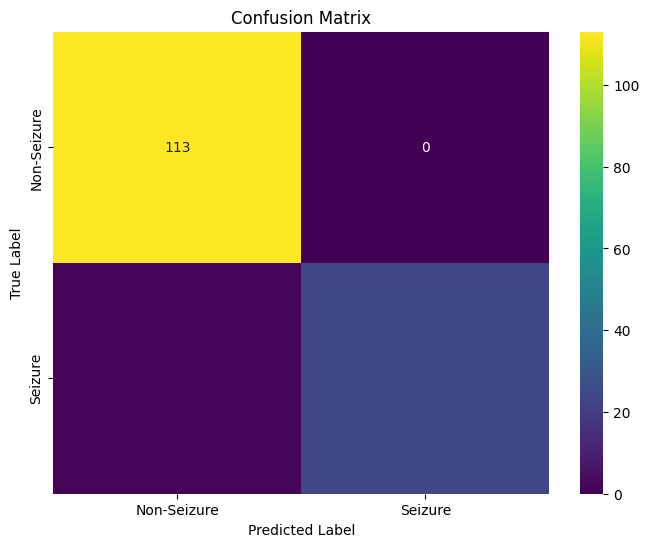

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Non-Seizure', 'Seizure'],
            yticklabels=['Non-Seizure', 'Seizure'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Seizure/ Non-seizure split - Actual vs Predicted

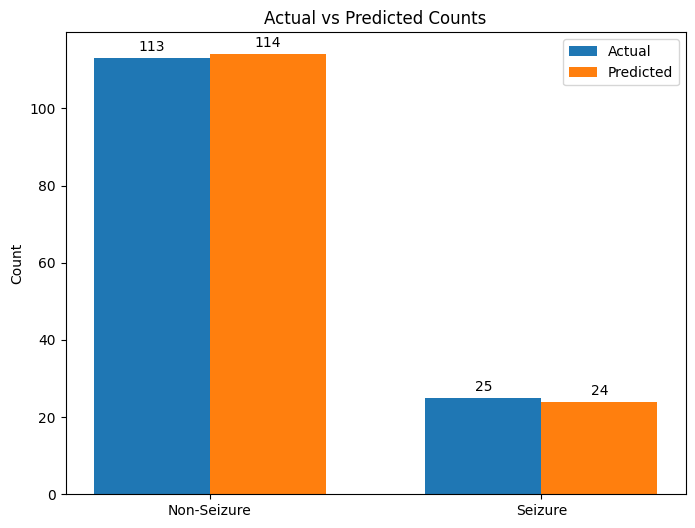

In [36]:
y_test_numeric = y_test.map({'non-seizure': 0, 'seizure': 1})
y_pred_numeric = pd.Series(y_pred).map({'non-seizure': 0, 'seizure': 1})

actual_counts = np.bincount(y_test_numeric)
predicted_counts = np.bincount(y_pred_numeric)

labels = ['Non-Seizure', 'Seizure']

width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(np.arange(len(labels)) - width/2, actual_counts, width, label='Actual')
bar2 = ax.bar(np.arange(len(labels)) + width/2, predicted_counts, width, label='Predicted')

ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylabel('Count')
ax.set_title('Actual vs Predicted Counts')
ax.legend()

for bar, counts in zip([bar1, bar2], [actual_counts, predicted_counts]):
    for rect, count in zip(bar, counts):
        height = rect.get_height()
        ax.annotate(f'{count}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

### Machine learning model using Convolutional Neural Network

Epoch 1/25
110/110 [==============================] - 2s 6ms/step - loss: 0.5313 - accuracy: 0.7991 - val_loss: 0.5595 - val_accuracy: 0.7273
Epoch 2/25
110/110 [==============================] - 1s 5ms/step - loss: 0.4753 - accuracy: 0.8037 - val_loss: 0.5448 - val_accuracy: 0.7364
Epoch 3/25
110/110 [==============================] - 1s 5ms/step - loss: 0.4666 - accuracy: 0.8014 - val_loss: 0.5373 - val_accuracy: 0.7455
Epoch 4/25
110/110 [==============================] - 1s 5ms/step - loss: 0.4449 - accuracy: 0.8082 - val_loss: 0.5169 - val_accuracy: 0.7455
Epoch 5/25
110/110 [==============================] - 1s 5ms/step - loss: 0.4143 - accuracy: 0.8174 - val_loss: 0.4838 - val_accuracy: 0.7727
Epoch 6/25
110/110 [==============================] - 1s 5ms/step - loss: 0.4216 - accuracy: 0.8151 - val_loss: 0.6060 - val_accuracy: 0.7455
Epoch 7/25
110/110 [==============================] - 1s 5ms/step - loss: 0.3902 - accuracy: 0.8288 - val_loss: 0.4911 - val_accuracy: 0.7727
Epoch 

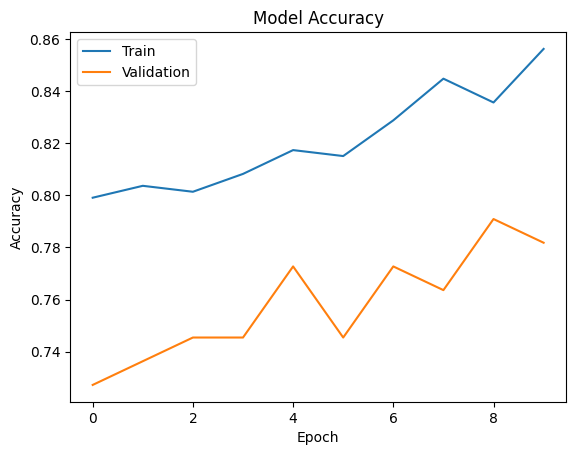

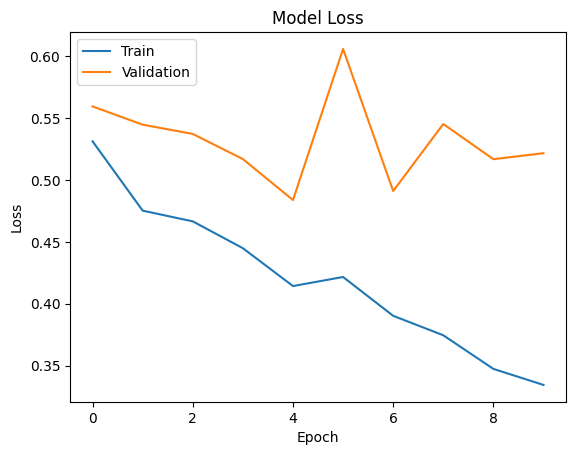

In [42]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

df3 = df_final
df3['label'] = df3['label'].map({'non-seizure': 0, 'seizure': 1})
X = df3.drop(columns = ['label','File_no'], axis=1)
y = df3['label']

X_array = np.array(X)
y_array = np.array(y, dtype=np.float32)

X_array = X_array.reshape(X_array.shape[0], X_array.shape[1], 1)
X_train, X_test, y_train, y_test = train_test_split(X_array, y_array, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train.reshape(X_train.shape[0], -1))
X_test_scaled = scaler.transform(X_test.reshape(X_test.shape[0], -1))

X_train_scaled = X_train_scaled.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test_scaled = X_test_scaled.reshape(X_test.shape[0], X_test.shape[1], 1)

model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
early_stopping = EarlyStopping(monitor='val_loss', patience=5)
history = model.fit(X_train_scaled, y_train, validation_split=0.2, batch_size=4, epochs=25, verbose=1, callbacks=[early_stopping])

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [43]:
y_pred_prob = model.predict(X_test_scaled)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)

5/5 [==============================] - 0s 3ms/step
Accuracy: 0.82
Confusion Matrix:
[[109   4]
 [ 21   4]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.84      0.96      0.90       113
         1.0       0.50      0.16      0.24        25

    accuracy                           0.82       138
   macro avg       0.67      0.56      0.57       138
weighted avg       0.78      0.82      0.78       138



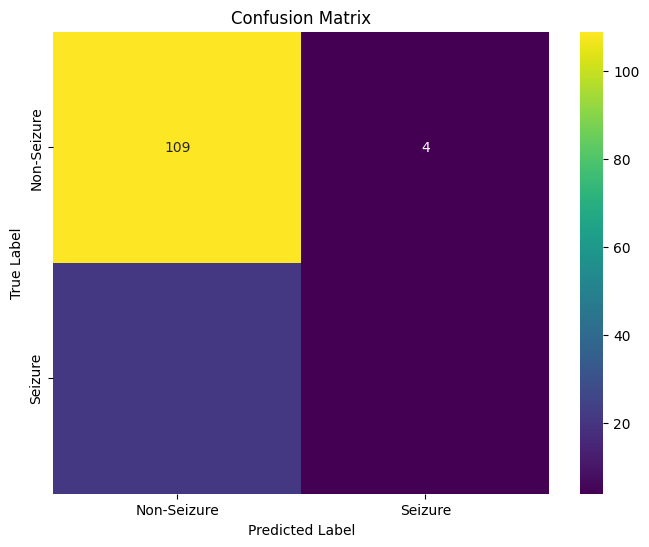

In [44]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='viridis',
            xticklabels=['Non-Seizure', 'Seizure'],
            yticklabels=['Non-Seizure', 'Seizure'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

### Seizure/ Non-seizure split - Actual vs Predicted

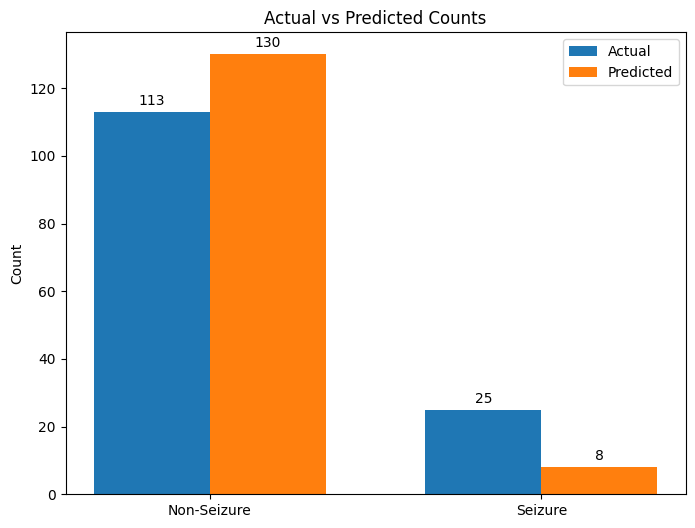

In [45]:
y_test_numeric = y_test.astype(int)
y_pred_numeric = y_pred

actual_counts = np.bincount(y_test_numeric)
predicted_counts = np.bincount(y_pred_numeric)

labels = ['Non-Seizure', 'Seizure']

width = 0.35
fig, ax = plt.subplots(figsize=(8, 6))
bar1 = ax.bar(np.arange(len(labels)) - width/2, actual_counts, width, label='Actual')
bar2 = ax.bar(np.arange(len(labels)) + width/2, predicted_counts, width, label='Predicted')

ax.set_xticks(np.arange(len(labels)))
ax.set_xticklabels(labels)
ax.set_ylabel('Count')
ax.set_title('Actual vs Predicted Counts')
ax.legend()

for bar, counts in zip([bar1, bar2], [actual_counts, predicted_counts]):
    for rect, count in zip(bar, counts):
        height = rect.get_height()
        ax.annotate(f'{count}', xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.show()

### Last updated : 12/14/2023